In [39]:
%matplotlib nbagg
import newleg, geofield, xyzfield, dipole
import numpy
from matplotlib import pyplot
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [4]:
m,l=newleg.degrees(2, start=1)
m.shape

(8,)

In [31]:
sha=geofield.SHADIFData("../data/sha.dif.14k/coef_EPSL_tnmgh.dat", "../data/sha.dif.14k/error_coef_EPSL_tnmgh.dat")
northlons_2, northlats_2 = xyzfield.magnetic_north(sha.gcomp, 2, south=False)

In [20]:
magnetic_north_data = numpy.loadtxt("../data/sha.dif.14k/magnetic_north.csv",delimiter=",")

magnetic_north_data = magnetic_north_data[magnetic_north_data[:,0] > -6000]

magnetic_north_years = magnetic_north_data[:, 0]
magnetic_north_lat = magnetic_north_data[:, 1]
magnetic_north_lon = magnetic_north_data[:, 2]

In [2]:
from mpl_toolkits.basemap import Basemap

In [34]:
base = Basemap(projection="ortho", lat_0 = 90, lon_0 = 0,
               llcrnrx=-2000000,llcrnry=-2000000,
               urcrnrx=2000000, urcrnry=2000000, resolution="l")

In [64]:
iterations = 10000

xs = numpy.zeros((iterations,len(sha.years)))
ys = xs.copy()
zs = xs.copy()

gshort = sha.gcomp[..., :8]
gshort_err = sha.gcomp_err[..., :8] #doesn't exist yet

for i in range(iterations):
    gi = gshort+numpy.random.randn(*gshort.shape)*gshort_err
    xs[i,:], ys[i,:], zs[i,:] = dipole.ecc_dipole(gi)
    
x = xs.sum(axis=0)/iterations
y = ys.sum(axis=0)/iterations
z = zs.sum(axis=0)/iterations

ss, zs, phis = dipole.xyz2cyl(xs,ys,zs)
phis = phis % (2*numpy.pi)
rs = numpy.sqrt(xs**2+ys**2+zs**2)
s, z, phi = dipole.xyz2cyl(x,y,z)
phi = phi % (2*numpy.pi)
r = numpy.sqrt(x**2+y**2+z**2)

s_dev = numpy.sqrt(((ss-s)**2).sum(axis=0)/iterations)
z_dev = numpy.sqrt(((zs-z)**2).sum(axis=0)/iterations)
r_dev = numpy.sqrt(((rs-r)**2).sum(axis=0)/iterations)
phi_dev = numpy.sqrt(((phis-phi)**2).sum(axis=0)/iterations)

del xs, ys, zs, phis, rs, ss

In [65]:
nlatest_2=90-abs(90-numpy.array(northlats_2))[numpy.array(sha.years) >= -1000]
nlontest_2=(numpy.array(northlons_2) % 360)[numpy.array(sha.years) >= -1000]

x_post = x[numpy.array(sha.years) >= -1000]
y_post = y[numpy.array(sha.years) >= -1000]
z_post = z[numpy.array(sha.years) >= -1000]

<IPython.core.display.Javascript object>


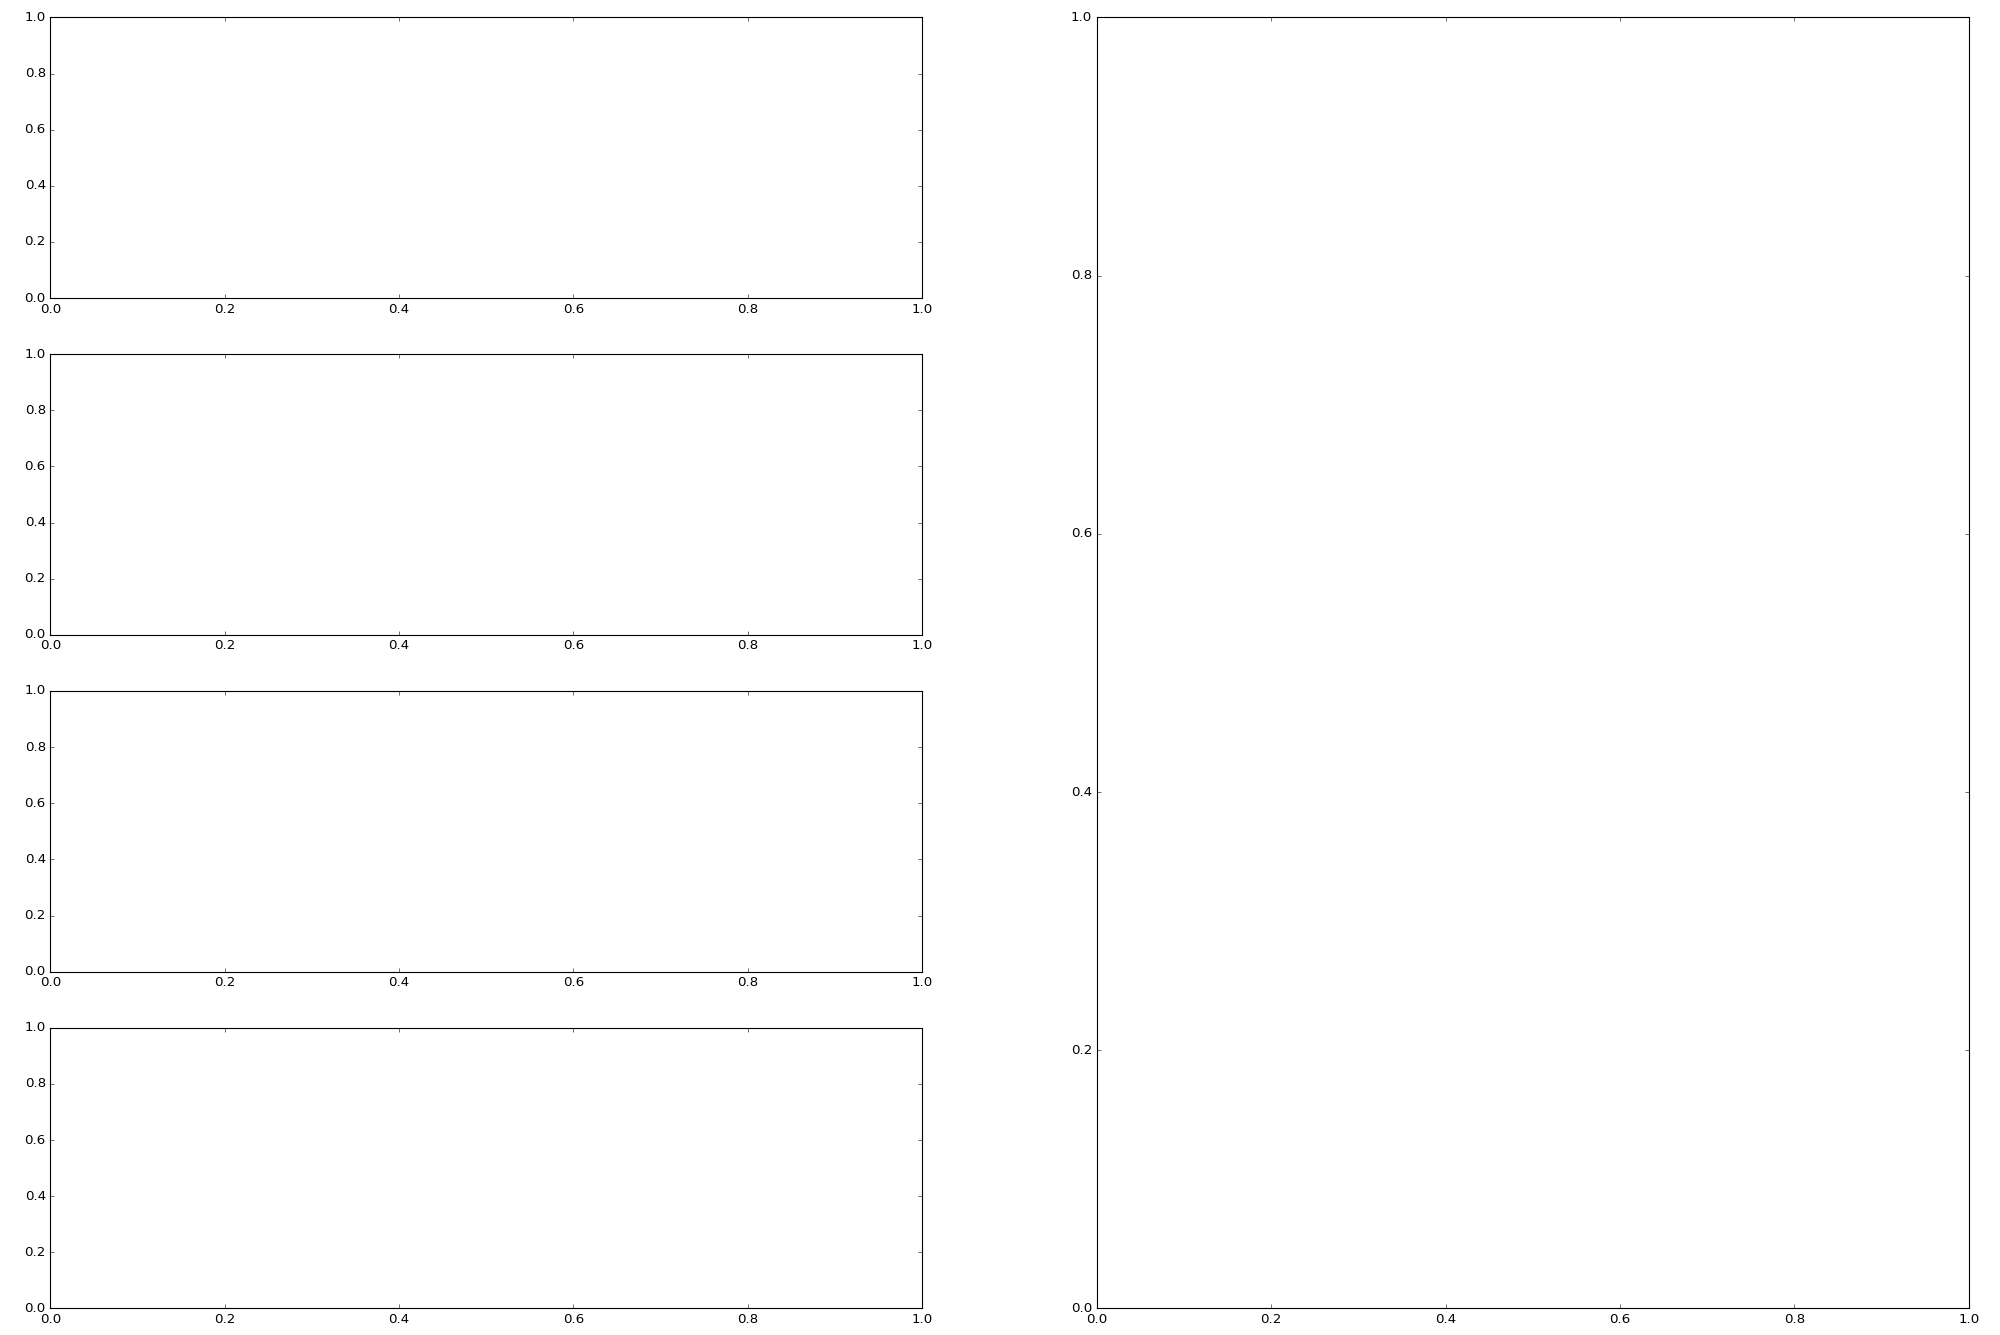

In [67]:
fig, ax = pyplot.subplots(figsize=(20,20))
fig.tight_layout()

base.drawcoastlines(ax=ax)

#base.plot(magnetic_north_lon, magnetic_north_lat, latlon=True, ax=ax,
#          c="#3172EB", marker="o", markersize=2.5, markeredgecolor="None", linewidth=0.3, label="Pavón et al. 2014")

base.plot(nlontest_2, nlatest_2 , latlon=True, ax=ax,
          c="#202020", marker="o", markersize=2.5, markeredgecolor="None", linewidth=0.3, label="Geomagnetic north ($l_{max} = 2$)")

ax.plot(1000*y_post+6370997.0, 1000*x_post+6370997.0, color="#CB56E8", marker="o", markersize=2.5, linewidth=0.6, label="Eccentric dipole center (projected)")

ax.legend(loc="upper right")

In [43]:
base(0,0)

(6370997.0, 0.0)

<IPython.core.display.Javascript object>


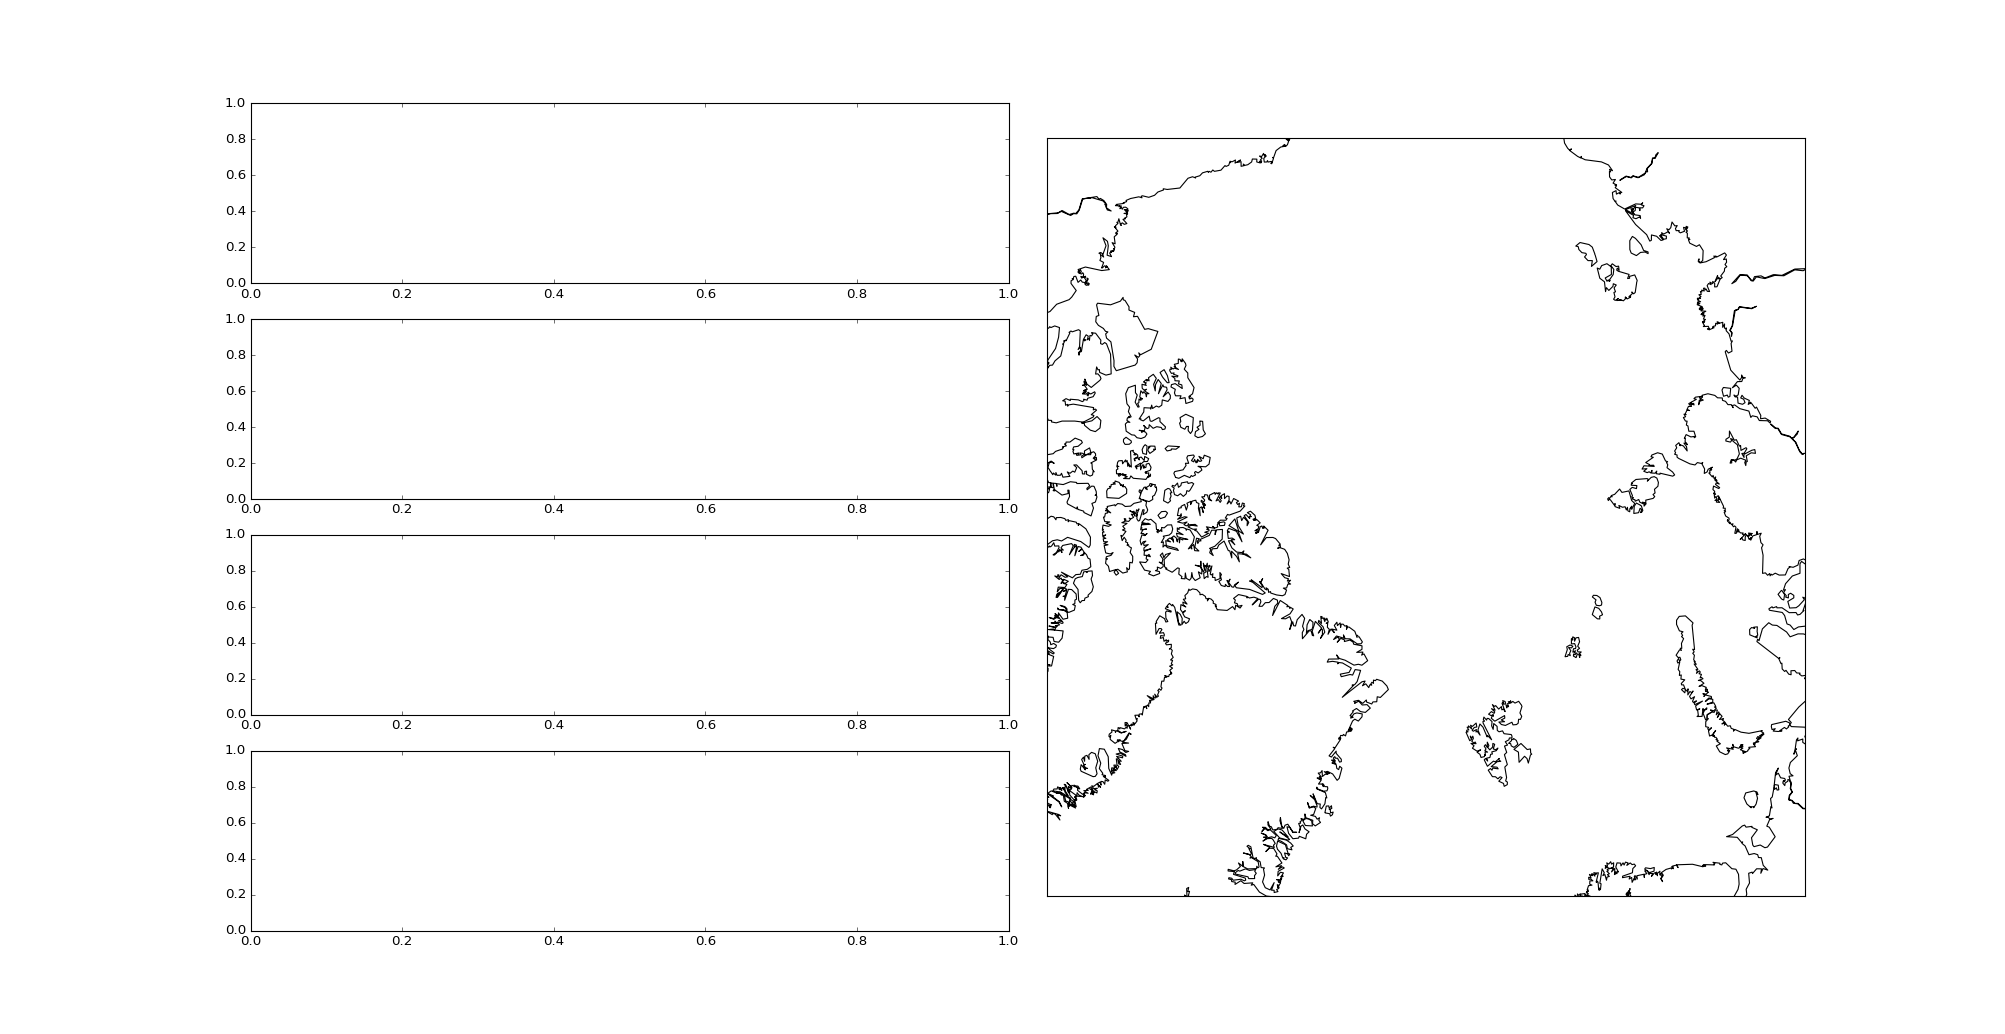

In [74]:
from matplotlib import gridspec

fig = pyplot.figure(figsize=(22,10))

gs = gridspec.GridSpec(4, 2, wspace=0.05)

ax1 = pyplot.subplot(gs[:, 1])
ax2 = pyplot.subplot(gs[0, 0])
ax3 = pyplot.subplot(gs[1, 0])
ax4 = pyplot.subplot(gs[2, 0])
ax5 = pyplot.subplot(gs[3, 0])

for axi in (ax1, ax2, ax3, ax4, ax5): fig.add_axes(axi)
    
base.drawcoastlines(ax=ax1)

In [75]:
import matplotlib